## ESPM 50AC

### Final Project: Using Data Science To Illustrate The Relationship Between Concentrated Marginalized Groups and the Spatial Distribution of GHG Emissions 


#### Sharan Sahu

## Introduction

 As we have discussed multiple times in lectures and discussions, global climate change seems to impact marginalized groups the most although they have contributed the least to climate change. A recent field of study that seeks to use datasets and data analysis to create insights about the impact of climate change on different social groups is called environmental data science. Furthermore, in documentaries such as Fence Line, we have seen how oil and power companies are located near marginalized communities, thus creating disparities in terms of climate change effects on these groups. This creative project seeks to use demographic datasets and datasets from the Environmental Protection Agency regarding greenhouse gas reporting to visualize the relationship between the spatial distribution of marginalized groups and GHG Emissions. This will use technologies such as Python and various data science packages to create visualizations. As an extension of this project if time permits, I will attempt to use machine learning techniques such as forecasting to illustrate a time series of how the spatial distribution of GHG emissions has been correlated with the spatial distribution of marginalized groups and how it may change in the future. This project also seeks to create insights that we have not discussed in class such as the relationship between the spatial distribution of GHG emissions and other minority groups that we have not investigated thoroughly.


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
# import contextily as ctx
"""
import geoplot.crs as gcrs
import cartopy.crs as ccrs
import cartopy
import geoplot as gplt
"""
import matplotlib as mpl
from matplotlib import pyplot as plt
from folium.plugins import MarkerCluster, HeatMap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

## Exploratory Data Analysis And Cleaning For EPA GHG Reporting Dataset

We first load up the data to see what the data looks like. The columns of the dataset are wordy, so we can change th e names of the columns to be just the word following the period. We can also disregard any data that will not be used within the context of this project.

The dataset used is from [EPA Greenhouse Gas Reporting Program (GHGRP)](https://www.epa.gov/ghgreporting/ghg-reporting-program-data-sets). The GHGRP requires facilities emitting 25,000 metric tons ($mt$) of carbon dioxide equivalent ($CO_2e$) per year to report their emissions and many other related information annually.

In [2]:
emissions_data_summary = pd.read_csv("data_summary.CSV")

In [3]:
emissions_data_summary.head()

,V_GHG_EMITTER_SUBPART.ADDRESS1,V_GHG_EMITTER_SUBPART.ADDRESS2,V_GHG_EMITTER_SUBPART.CITY,V_GHG_EMITTER_SUBPART.CO2E_EMISSION,V_GHG_EMITTER_SUBPART.COUNTY,V_GHG_EMITTER_SUBPART.FACILITY_ID,V_GHG_EMITTER_SUBPART.GAS_CODE,V_GHG_EMITTER_SUBPART.GAS_NAME,V_GHG_EMITTER_SUBPART.LATITUDE,V_GHG_EMITTER_SUBPART.LONGITUDE,V_GHG_EMITTER_SUBPART.STATE,V_GHG_EMITTER_SUBPART.STATE_NAME,V_GHG_EMITTER_SUBPART.SUBPART_CATEGORY,V_GHG_EMITTER_SUBPART.SUBPART_NAME,V_GHG_EMITTER_SUBPART.SUBPART_TYPE,V_GHG_EMITTER_SUBPART.YEAR,V_GHG_EMITTER_SUBPART.ZIP,V_GHG_EMITTER_SUBPART.FACILITY_NAME,V_GHG_EMITTER_SUBPART.GHG_QUANTITY,V_GHG_EMITTER_SUBPART.COUNTY_FIPS
0,310 East Frontage Road,NaN,Kaukauna,2349.400,Outagamie,1000421,CO2,Carbon Dioxide,44.32040,-88.208900,WI,WISCONSIN,Stationary Combustion,C,E,2018,54130,Fox Energy Center,2349.400,55087.0
1,15400 VILLWOCK RD,NaN,EDWARDSPORT,746.192,Knox,1001541,N2O,Nitrous Oxide,38.80670,-87.247200,IN,INDIANA,Electricity Generation,D,E,2016,47500,Edwardsport,2.504,18083.0
2,NaN,NaN,Barstow,21499.500,WARD COUNTY,1005215,CH4,Methane,31.52250,-103.465278,TX,TEXAS,Petroleum and Natural Gas Systems,W,E,2016,79719,Mivida Treater Plant,859.980,48475.0
3,15 MILES N.W. OF WENDOVER NV,NaN,WEST WENDOVER,346763.600,ELKO COUNTY,1005828,CO2,Carbon Dioxide,40.82126,-114.250199,NV,NEVADA,Lime Production,S,E,2016,89883,GRAYMONT WESTERN US INC PILOT PEAK,346763.600,32007.0
4,11910 CR 492,NaN,TYLER,56.250,SMITH COUNTY,1001662,CH4,Methane,32.43442,-95.362850,TX,TEXAS,Stationary Combustion,C,E,2017,75706,TYLER PIPE COMPANY,2.250,48423.0


In [4]:
new_column_names = []
for columns in emissions_data_summary.columns:
    new_column_names.append(columns.split('.')[1])
emissions_data_summary.columns = new_column_names

In [5]:
data_formatted = emissions_data_summary[['ADDRESS1', 'ADDRESS2', 'CITY', 'CO2E_EMISSION', 'COUNTY',
       'FACILITY_ID', 'GAS_CODE', 'GAS_NAME', 'LATITUDE', 'LONGITUDE', 'STATE',
       'STATE_NAME', 'YEAR', 'ZIP', 'FACILITY_NAME', 'GHG_QUANTITY']]
data_formatted

,ADDRESS1,ADDRESS2,CITY,CO2E_EMISSION,COUNTY,FACILITY_ID,GAS_CODE,GAS_NAME,LATITUDE,LONGITUDE,STATE,STATE_NAME,YEAR,ZIP,FACILITY_NAME,GHG_QUANTITY
0,310 East Frontage Road,NaN,Kaukauna,2349.400,Outagamie,1000421,CO2,Carbon Dioxide,44.320400,-88.208900,WI,WISCONSIN,2018,54130,Fox Energy Center,2349.400
1,15400 VILLWOCK RD,NaN,EDWARDSPORT,746.192,Knox,1001541,N2O,Nitrous Oxide,38.806700,-87.247200,IN,INDIANA,2016,47500,Edwardsport,2.504
2,NaN,NaN,Barstow,21499.500,WARD COUNTY,1005215,CH4,Methane,31.522500,-103.465278,TX,TEXAS,2016,79719,Mivida Treater Plant,859.980
3,15 MILES N.W. OF WENDOVER NV,NaN,WEST WENDOVER,346763.600,ELKO COUNTY,1005828,CO2,Carbon Dioxide,40.821260,-114.250199,NV,NEVADA,2016,89883,GRAYMONT WESTERN US INC PILOT PEAK,346763.600
4,11910 CR 492,NaN,TYLER,56.250,SMITH COUNTY,1001662,CH4,Methane,32.434420,-95.362850,TX,TEXAS,2017,75706,TYLER PIPE COMPANY,2.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278210,71 MONAS WAY,NaN,SALEM,32903.900,DODDRIDGE COUNTY,1011071,CO2,Carbon Dioxide,39.207500,-80.554080,WV,WEST VIRGINIA,2014,26426,MORGAN COMPRESSOR STATION,32903.900
278211,17700 South Highway T,NaN,Deerfield,14.500,VERNON COUNTY,1010610,CH4,Methane,37.807250,-94.585301,MO,MISSOURI,2014,64741,ADM Deerfield,0.580
278212,1 ThyssenKrupp Drive,NaN,Calvert,18.476,WASHINGTON,1010763,N2O,Nitrous Oxide,31.156240,-88.012750,AL,ALABAMA,2012,36513,Outokumpu Stainless USA LLC,0.062
278213,105 East Port Lane,NaN,Summerville,17.880,DORCHESTER COUNTY,1011691,N2O,Nitrous Oxide,33.044777,-80.210887,SC,SOUTH CAROLINA,2018,29483,Lauscha Fiber International,0.060


## Data Insights and Analysis For EPA GHG Reporting Dataset

Below, we are given some insights into the GHG emissions broken down by state between the period of 2010-2019. Surprisingly, in terms of total GHG emissions during this period, Texas has been the greatest contributor of GHG emissions by a large margin compared to other states. In 2019, Texas became the nation's number 1 carbon dioxide  emitter and according to an article posted by the Federal Reserve Bank of Dallas by authors Emma Marshall and Jesse Thompson, "Texas’ high industrial share largely results from the production of energy-intensive goods such as motor fuels and petrochemicals, which yields substantial CO2 waste. The state is home to 30 percent of U.S. refining capacity and 70 percent of the nation’s basic petrochemical capacity." (Marshall and Thompson 10) [(Link to Article)](https://www.dallasfed.org/~/media/documents/research/swe/2019/swe1903c.pdf)

[]

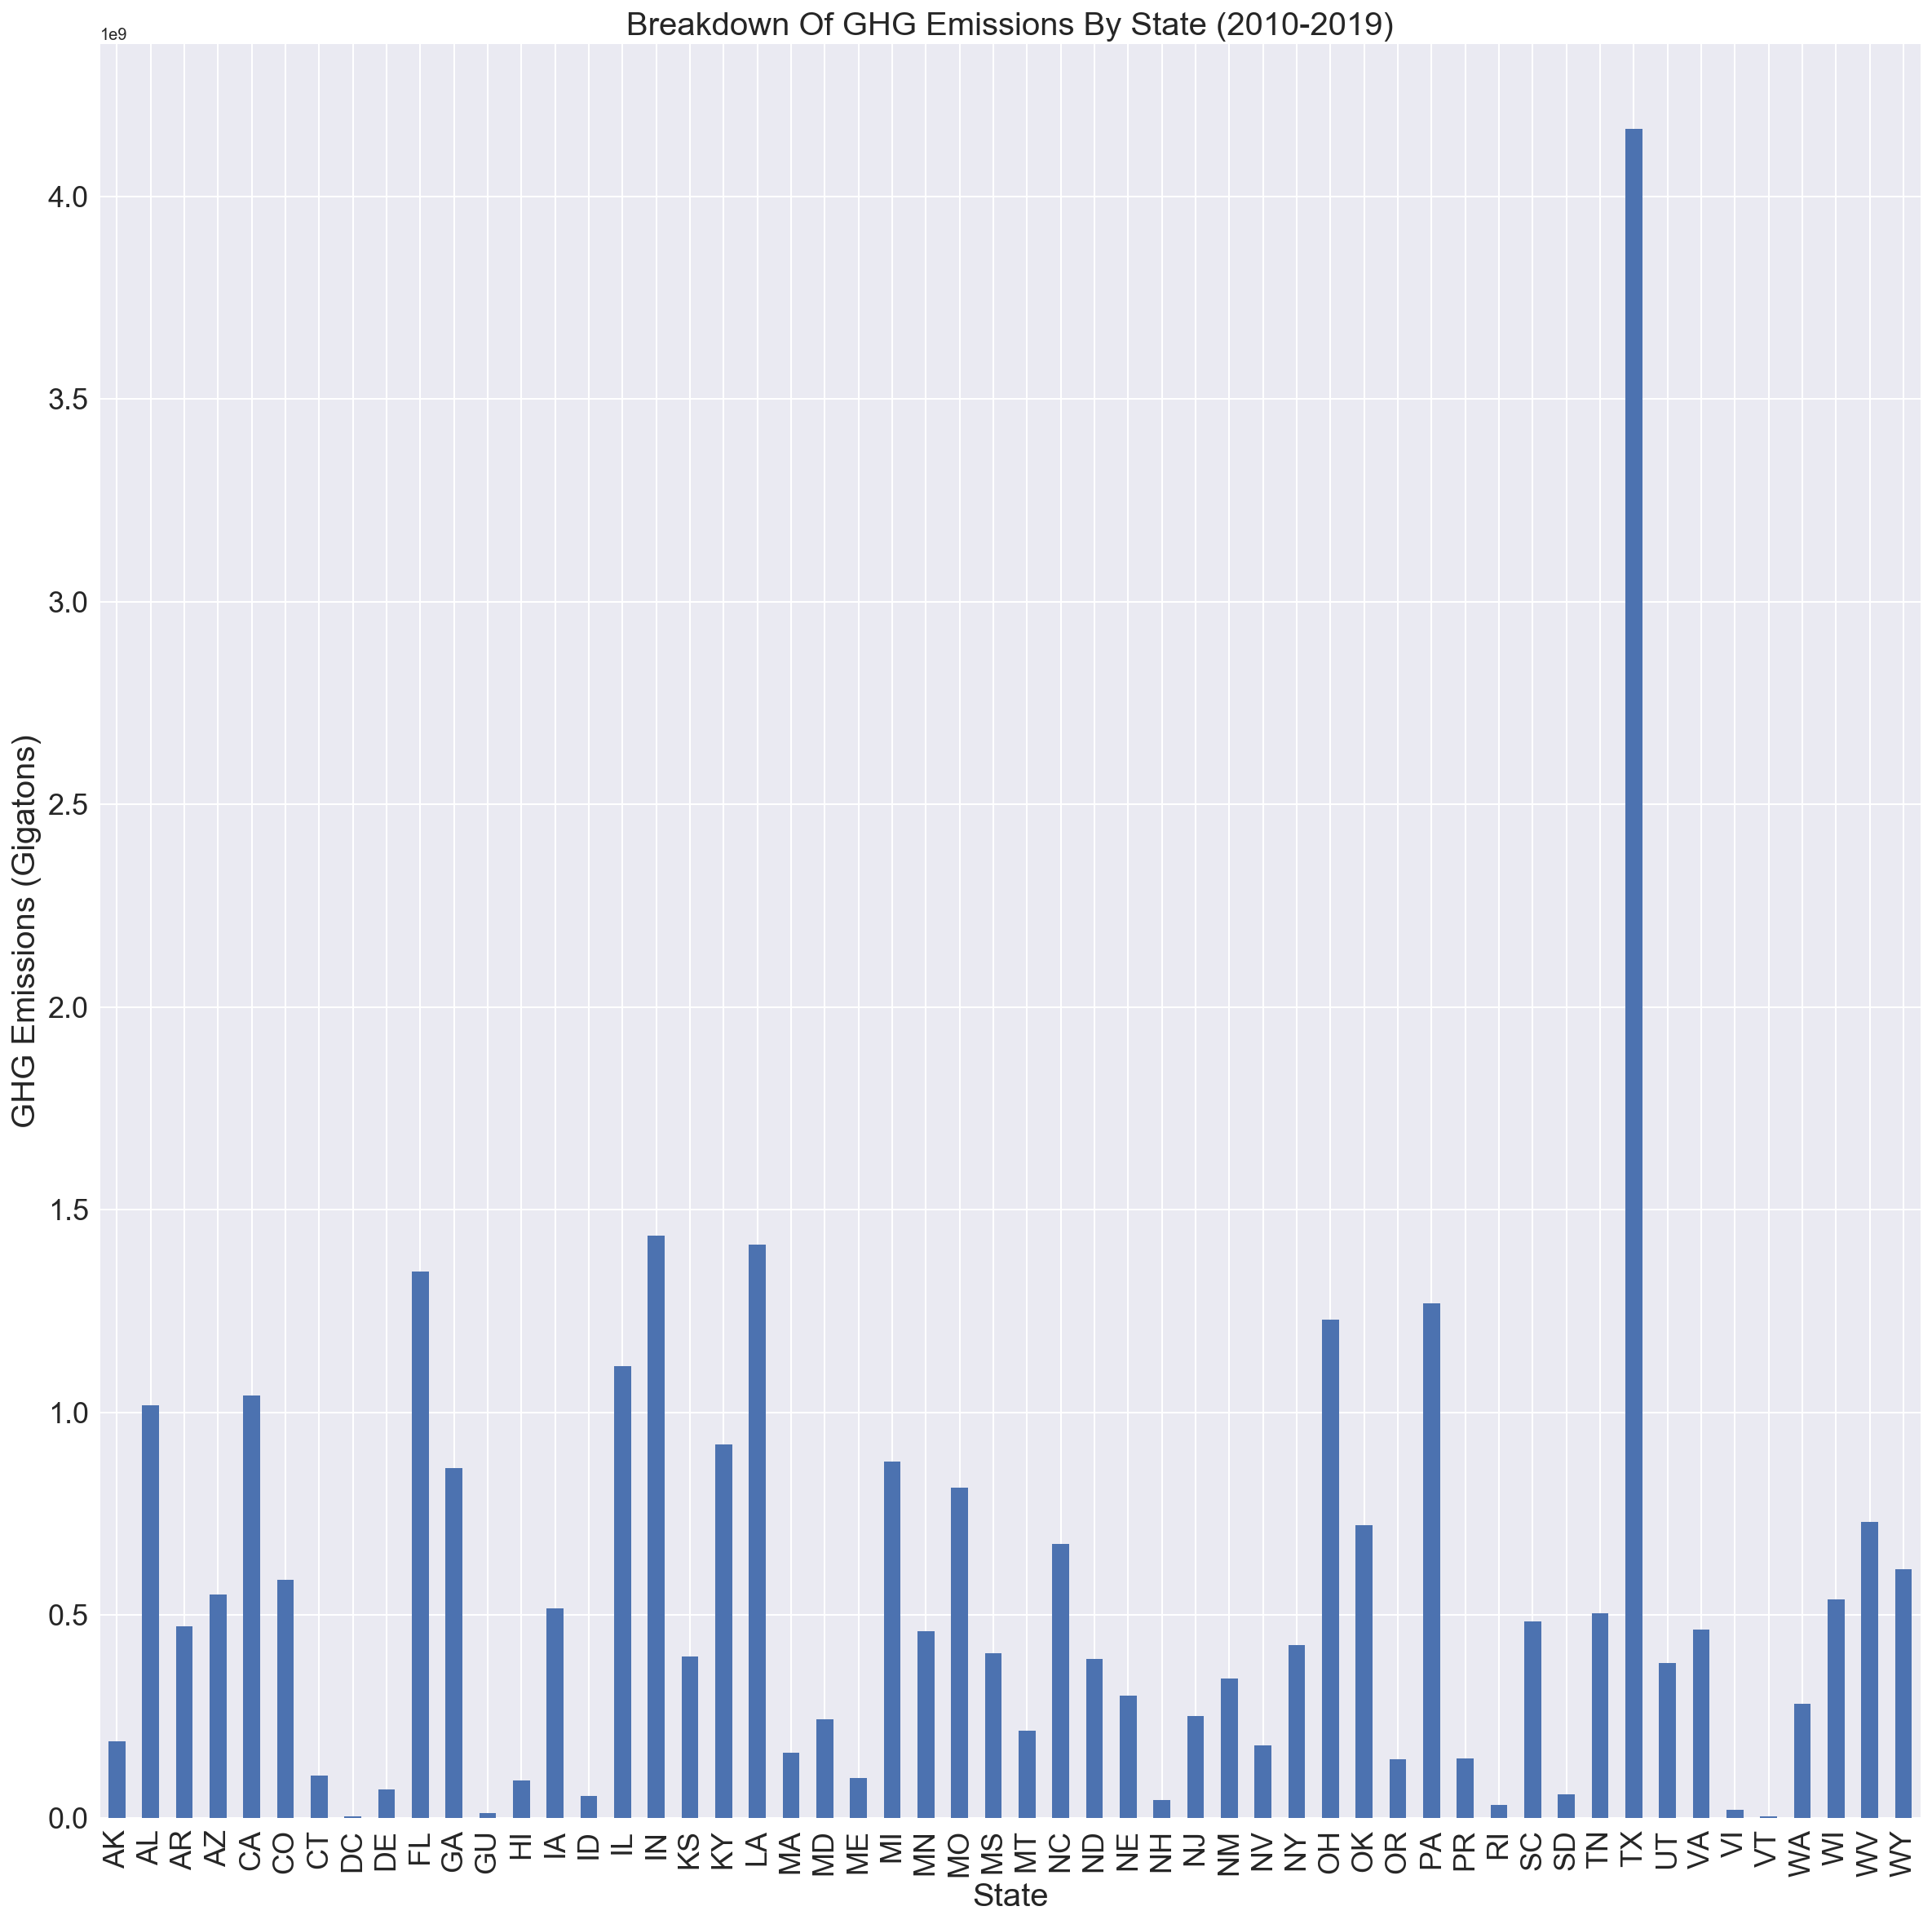

In [6]:
state_data = data_formatted.groupby("STATE").aggregate(np.sum)
state_data_plot = state_data.plot(y="GHG_QUANTITY", kind ='bar', figsize = (20, 20), legend = False, fontsize = 18)
state_data_plot.set_title(r"Breakdown Of GHG Emissions By State (2010-2019)", fontsize = 20)
state_data_plot.set_xlabel("State", fontsize = 20)
state_data_plot.set_ylabel("GHG Emissions (Gigatons)", fontsize = 20)
plt.plot()

Based on the information we have above, it is not surprising to see that Texas was the number one GHG emitter in 2019.

[]

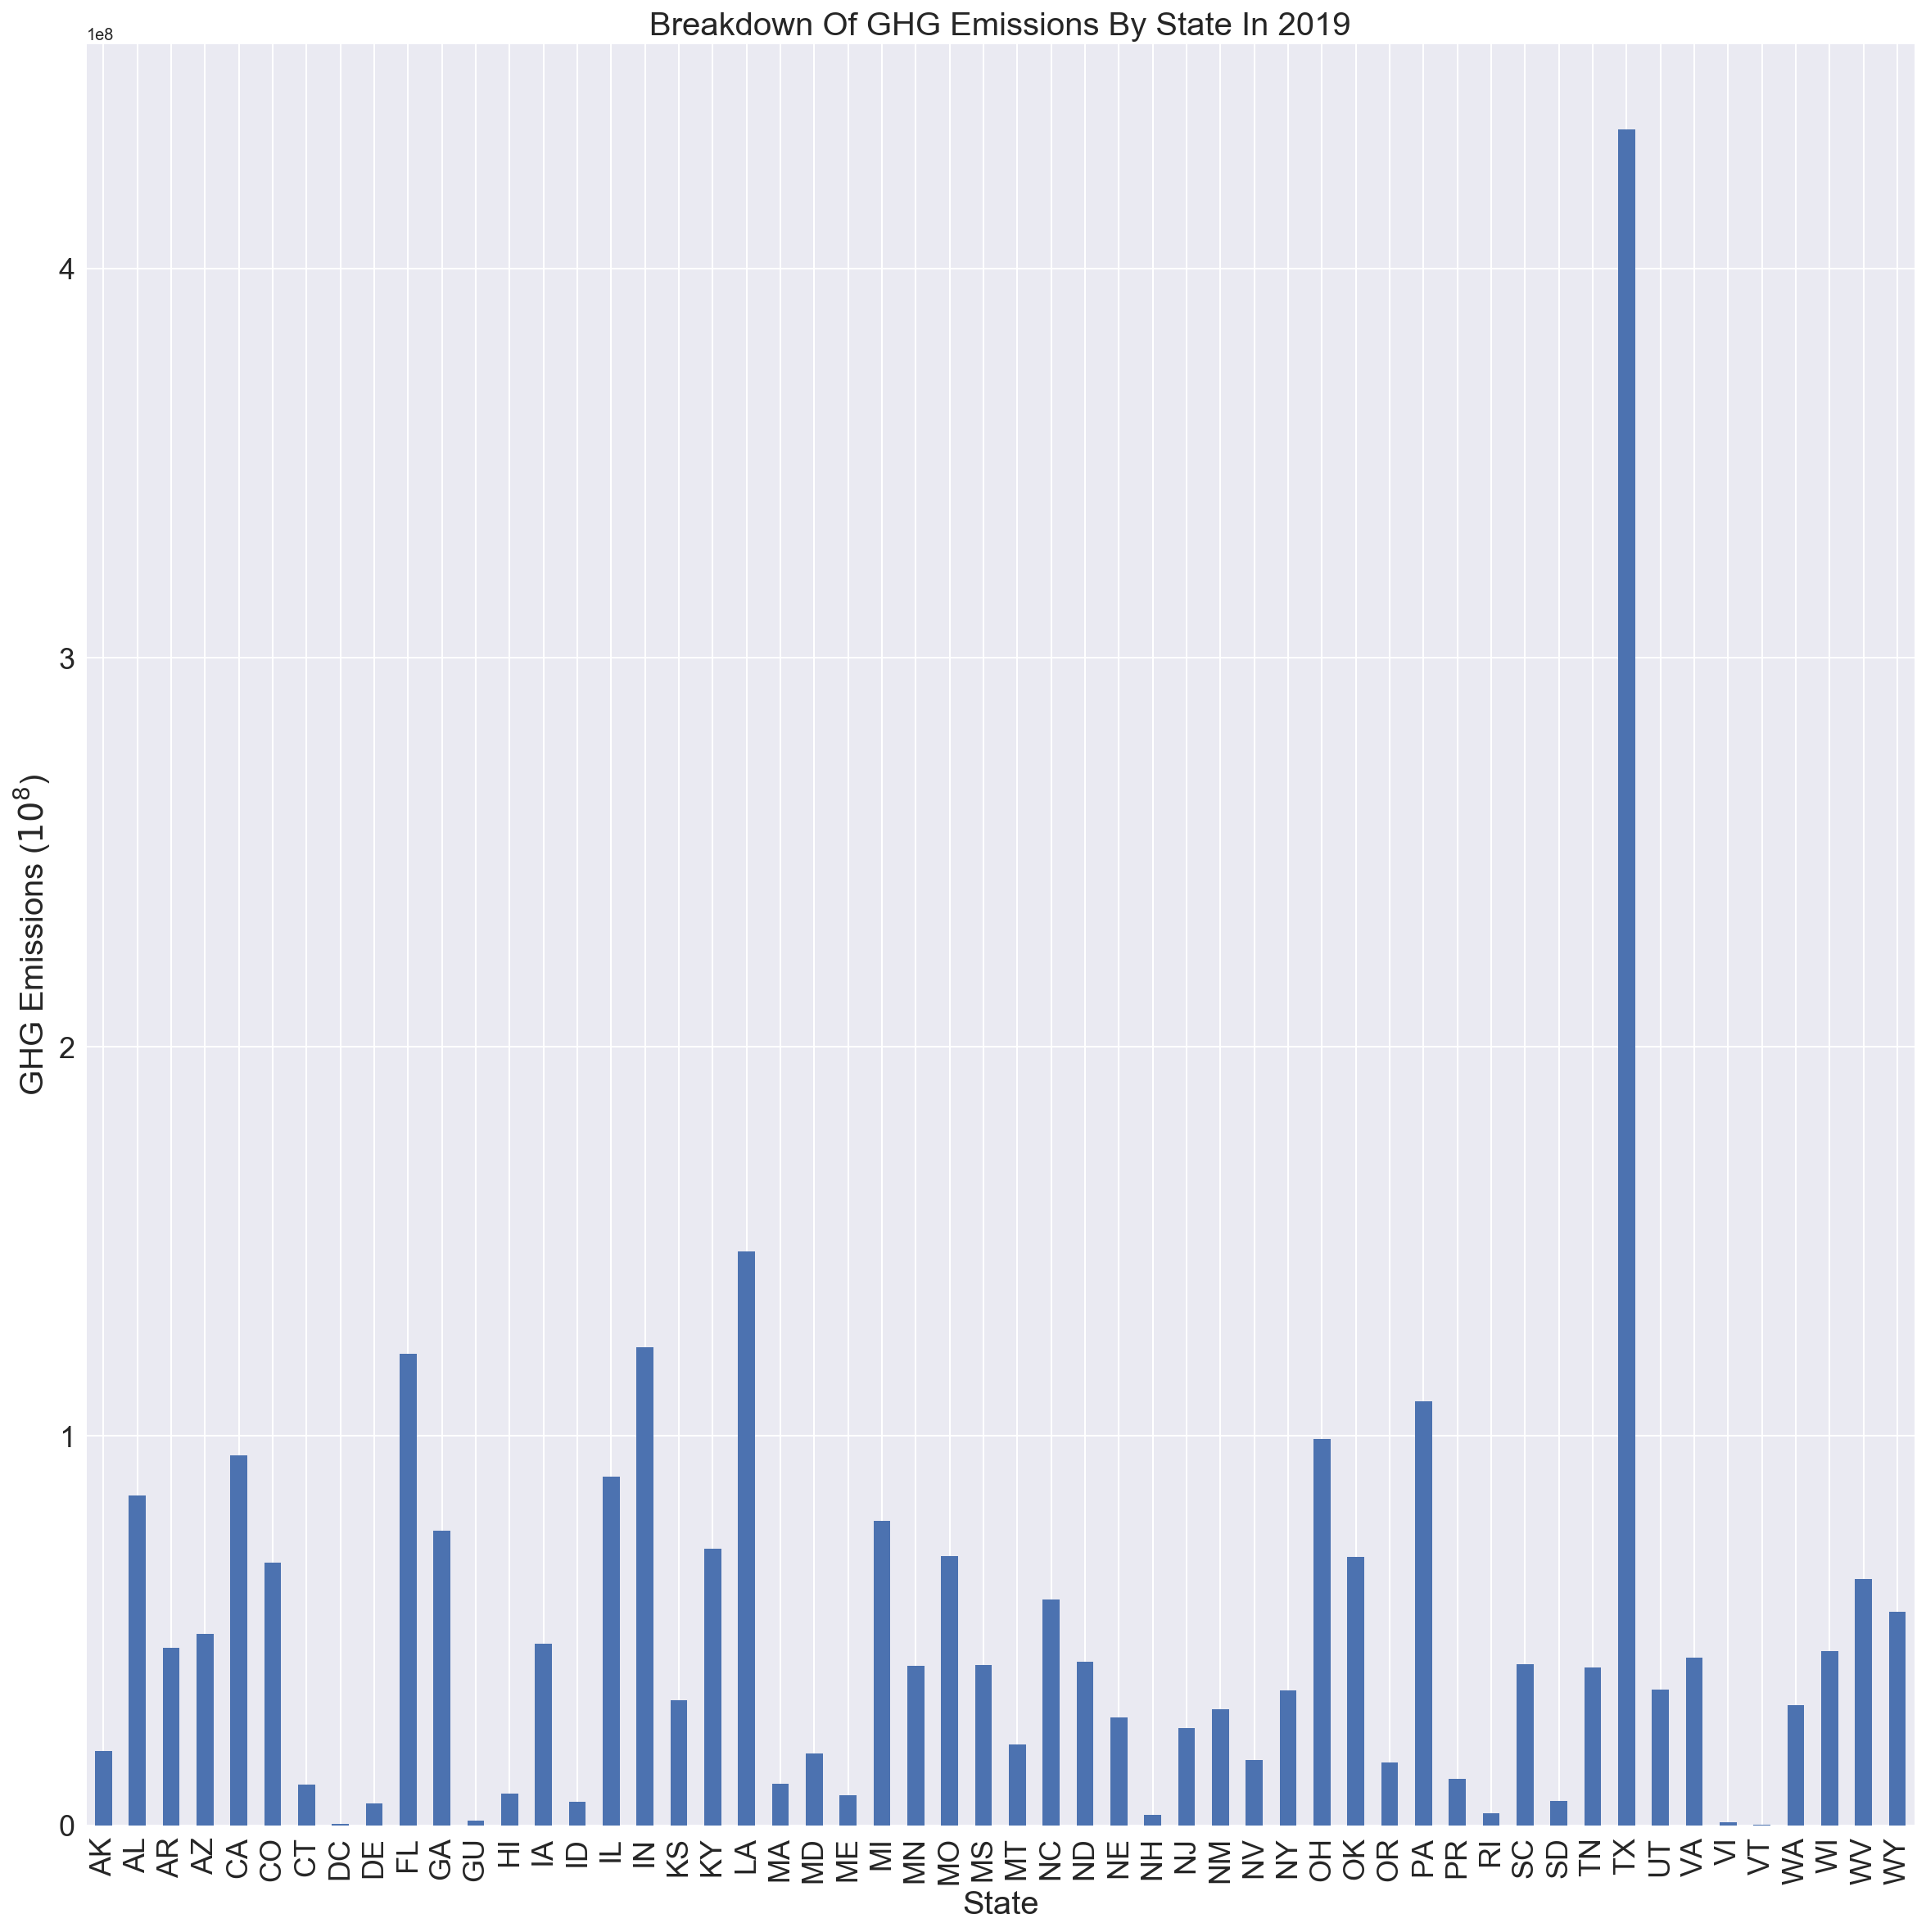

In [7]:
data_2019 = data_formatted[data_formatted['YEAR'] == 2019]

state_data_2019 = data_2019.groupby("STATE").aggregate(np.sum)

state_data_2019_plot = state_data_2019.plot(y="GHG_QUANTITY", kind ='bar', figsize = (20, 20), legend = False, fontsize = 18)
state_data_2019_plot.set_title('Breakdown Of GHG Emissions By State In 2019', fontsize = 20)
state_data_2019_plot.set_xlabel("State", fontsize = 20)
state_data_2019_plot.set_ylabel(r"GHG Emissions ($10^8$)", fontsize = 20)
plt.plot()

Below is a breakdown of the GHG emission usage from the period of 2010-2019. As we have seen before, Carbon Dioxide is the largest GHG Emission contributor, and this makes sense to why Texas has jumped up so highly when discussing GHG emissions since in 2019, they became the nation's number 1 carbon dioxide emitter.

[]

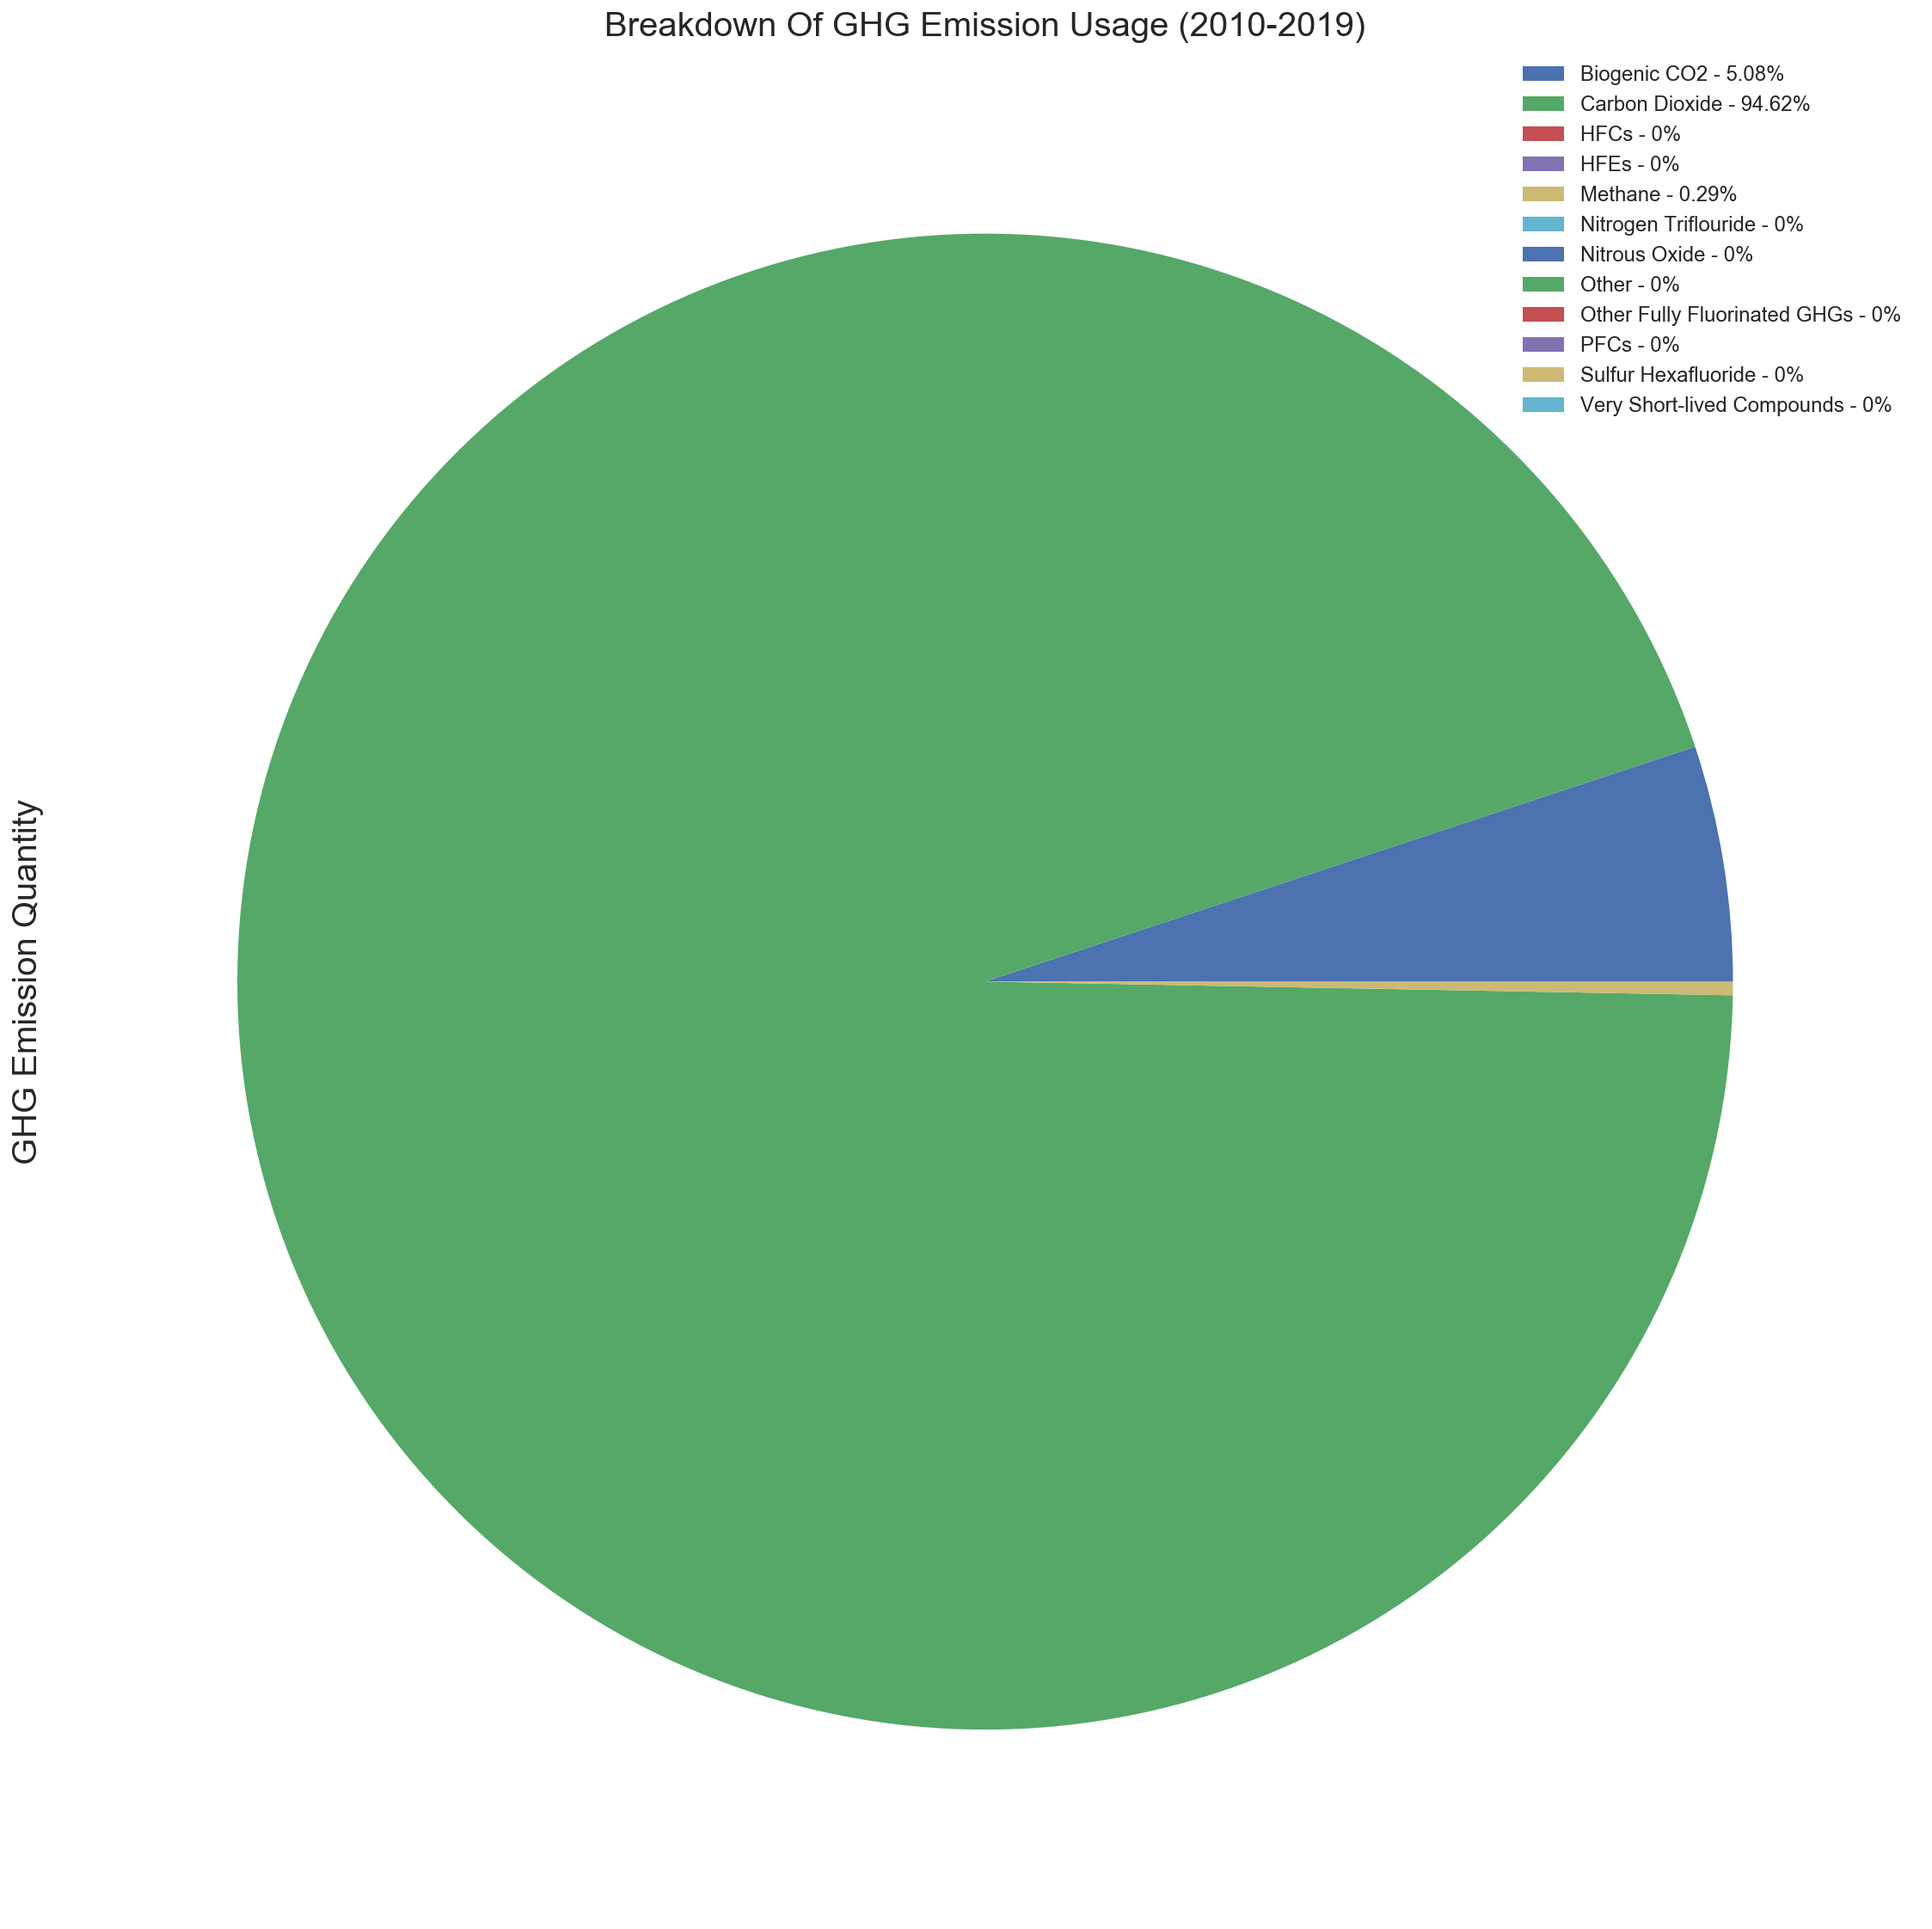

In [8]:
ghg_emission_breakdown = data_formatted.groupby("GAS_NAME").aggregate(np.sum)
ghg_emission_breakdown_plot = ghg_emission_breakdown.plot.pie(y="GHG_QUANTITY", figsize = (20, 20), legend = True, labels = ['' for i in range(len(data_formatted["GAS_NAME"]))])
ghg_emission_breakdown_plot.set_title("Breakdown Of GHG Emission Usage (2010-2019)", fontsize = 20)
ghg_emission_breakdown_plot.set_ylabel("GHG Emission Quantity", fontsize = 20)
total_emissions = sum(ghg_emission_breakdown['GHG_QUANTITY'])
percentages = [round(100.*i/total_emissions, 2)  for i in ghg_emission_breakdown['GHG_QUANTITY']]
ghg_emission_breakdown['GHG Percentage'] = percentages
labels = [
    "Biogenic CO2 - 5.08%",
    "Carbon Dioxide - 94.62%",
    "HFCs - 0%",
    "HFEs - 0%",
    "Methane - 0.29%",
    "Nitrogen Triflouride - 0%",
    "Nitrous Oxide - 0%",
    "Other - 0%",
    "Other Fully Fluorinated GHGs - 0%",
    "PFCs - 0%",
    "Sulfur Hexafluoride - 0%",
    "Very Short-lived Compounds - 0%",
]
plt.legend(labels, fontsize = 12)
plt.plot()

Although the United States has been one of the leading nations when discussing GHG emissions, it looks like while we are still emitting close to 3 gigatons of GHG, we are slowly making progress to reducing our GHG emissions through policy, adaptation, and mitigation

Text(0.5, 1.0, 'Progression of GHG Emissions (2010-2019)')

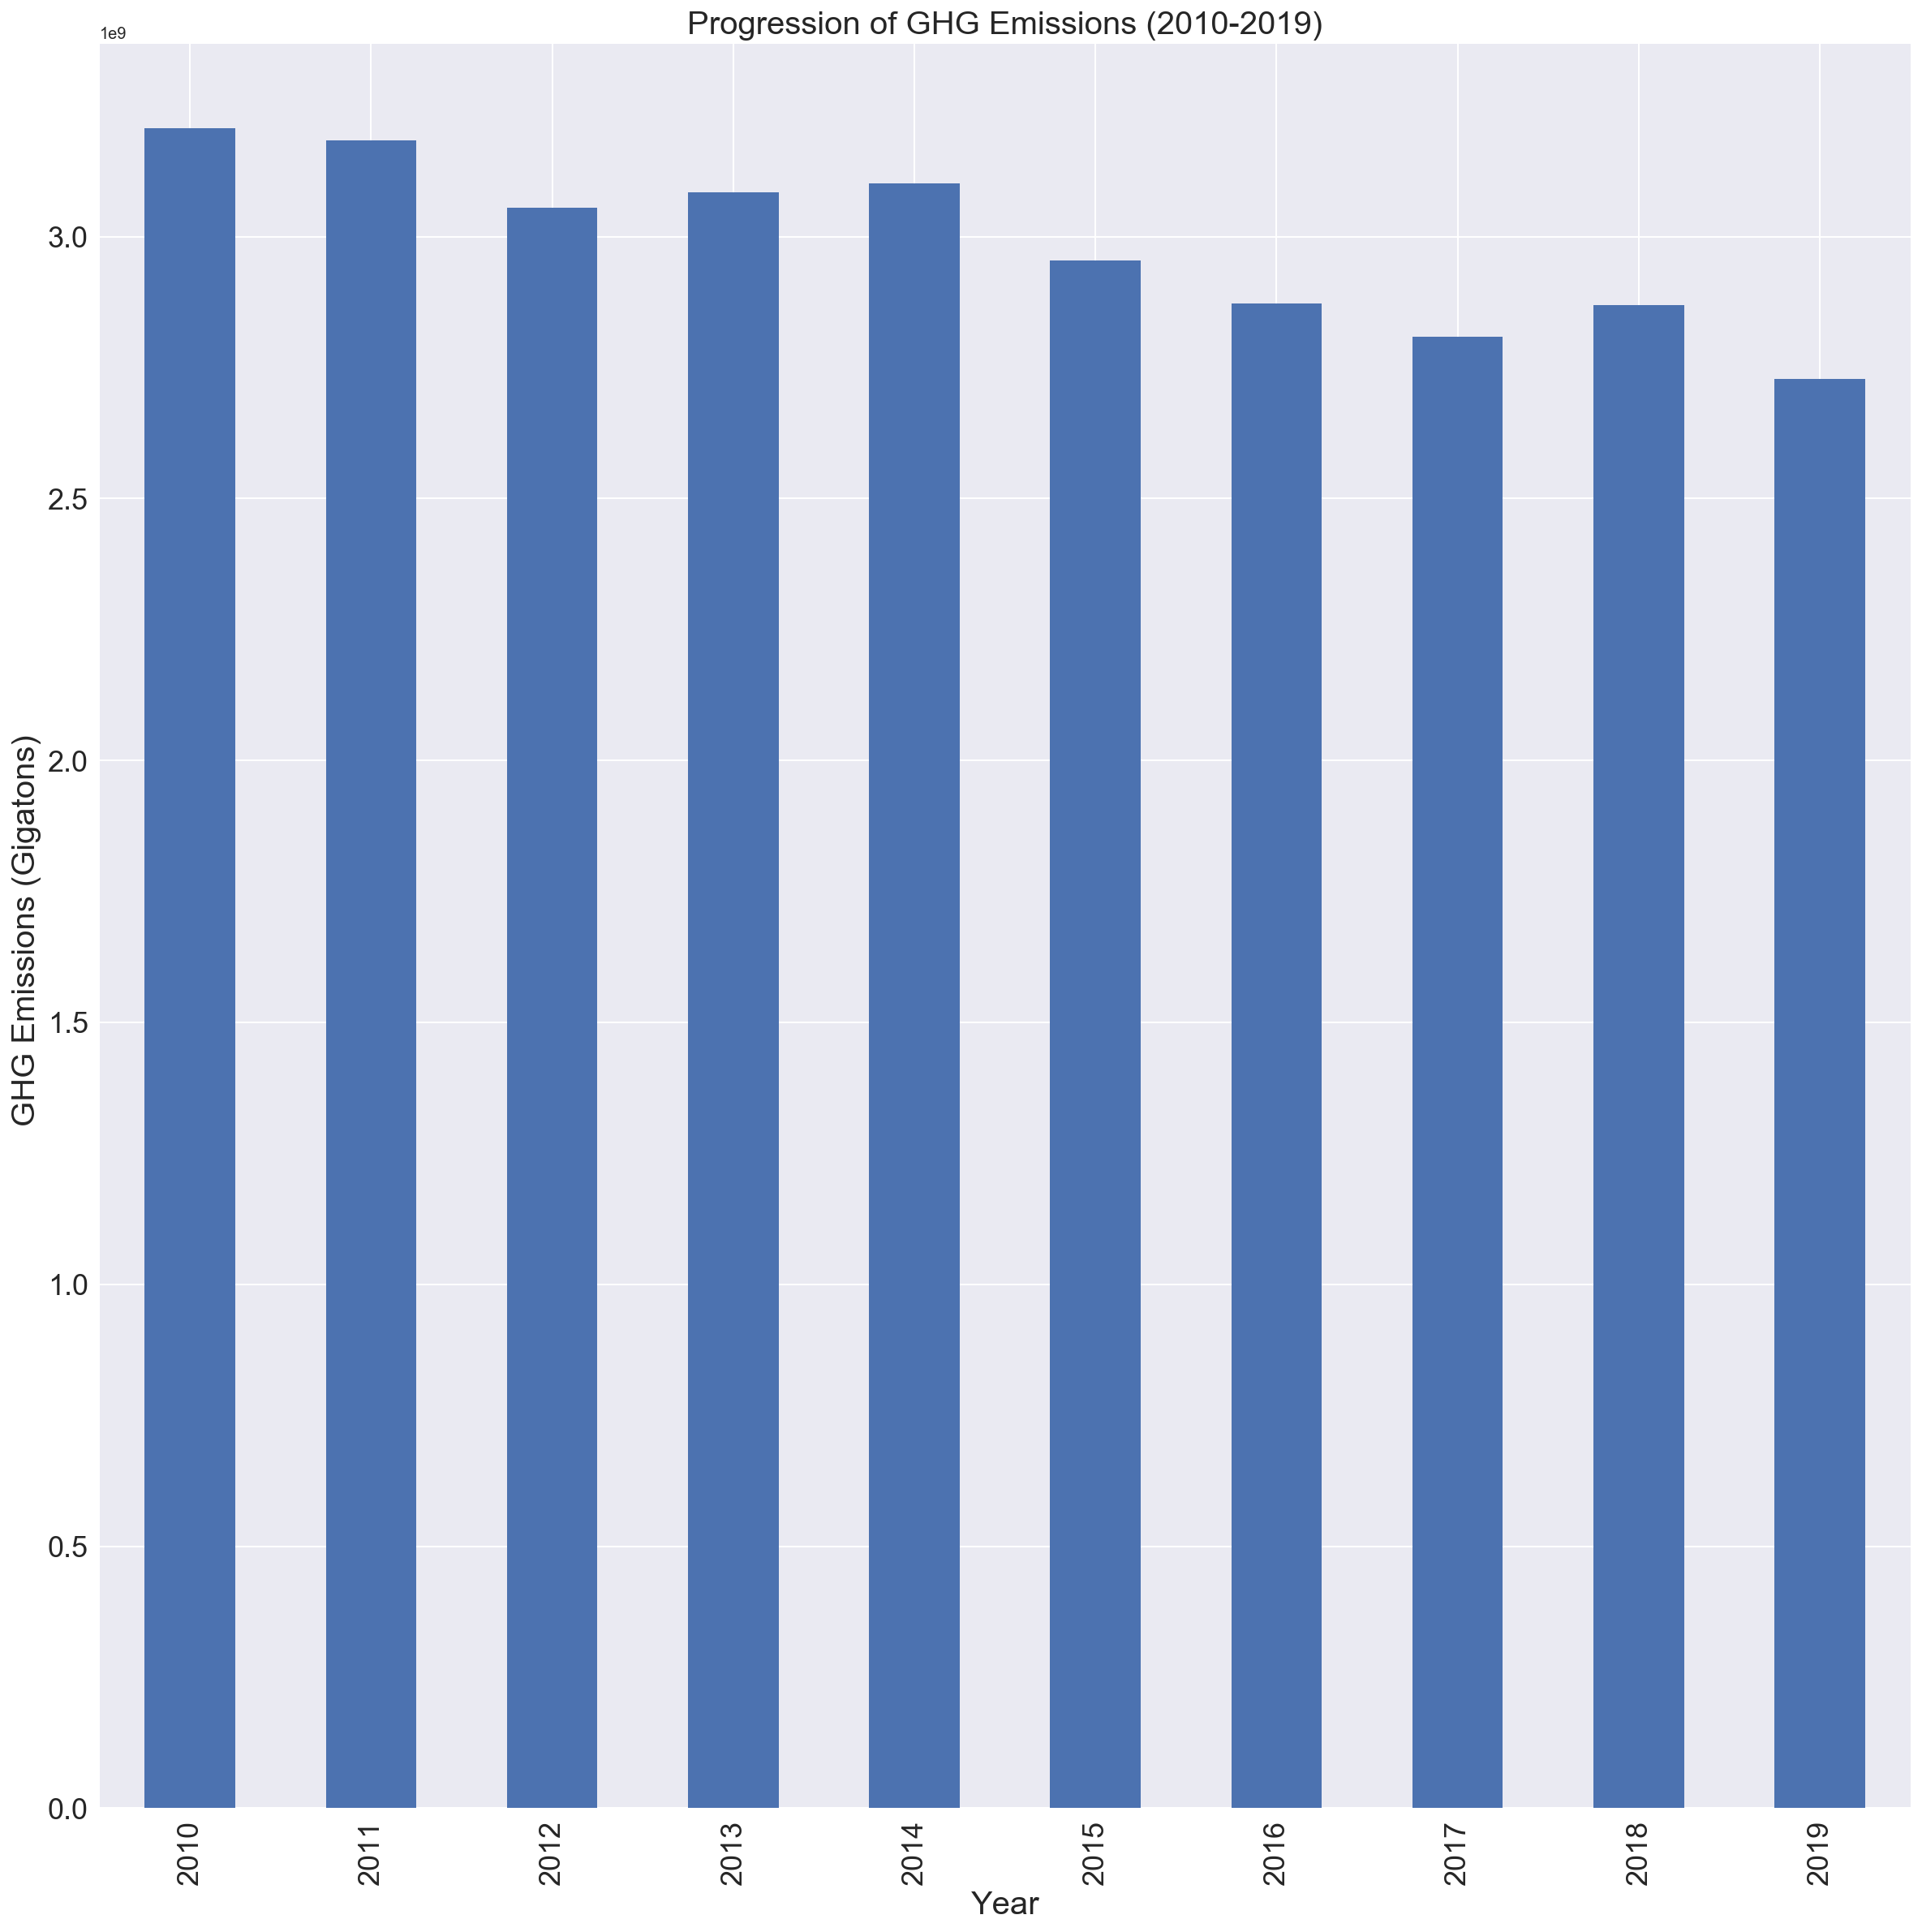

In [9]:
year_breakdown = data_formatted.groupby("YEAR").aggregate(np.sum)
year_breakdown_plot = year_breakdown.plot.bar(y = "GHG_QUANTITY", legend = False, figsize = (20, 20), fontsize = 18)
year_breakdown_plot.set_xlabel("Year", fontsize = 20)
year_breakdown_plot.set_ylabel("GHG Emissions (Gigatons) ", fontsize = 20)
year_breakdown_plot.set_title("Progression of GHG Emissions (2010-2019)", fontsize = 20)

## Exploratory Data Analysis And Cleaning For 2017 United States Census Dataset


We will now take a look at the demographics of the United States, particularly with the 2017 Census Data. With this data, we can take into account the demographics of different states within the United States and deduce which states emit the most GHG and have the greatest underrepresented minority groups. Below, we are doing some exploring of the data to see which information is most relevant, and filtering out the information that is not necessary for the analysis.

The data set used below is from [United States Census Bureau](https://data.census.gov/cedsci/profile?g=0100000US)

In [10]:
census_data_2017 = pd.read_csv("acs2017_county_data.csv")
census_data_2017.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [11]:
census_data_formatted = census_data_2017[['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific']]
census_data_formatted

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,0.0,0.0
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,0.0,0.0
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,0.0,0.0
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,0.0,0.0


## Data Insights and Analysis For 2017 United States Census Dataset

Below, we can see a breakdown of minority racial groups within the United States as reported by the 2017 United States Census Dataset. As we see, the majority of minority groups are found within the state of Texas, Georgia, Mississipi, Louisiana, Virginia, and Puerto Rico. In the subsequent following this, we can begin to make some insights into the spatial distribution of minority groups and the spatial distribution of GHG emissions within the United States.

Text(0, 0.5, 'Population')

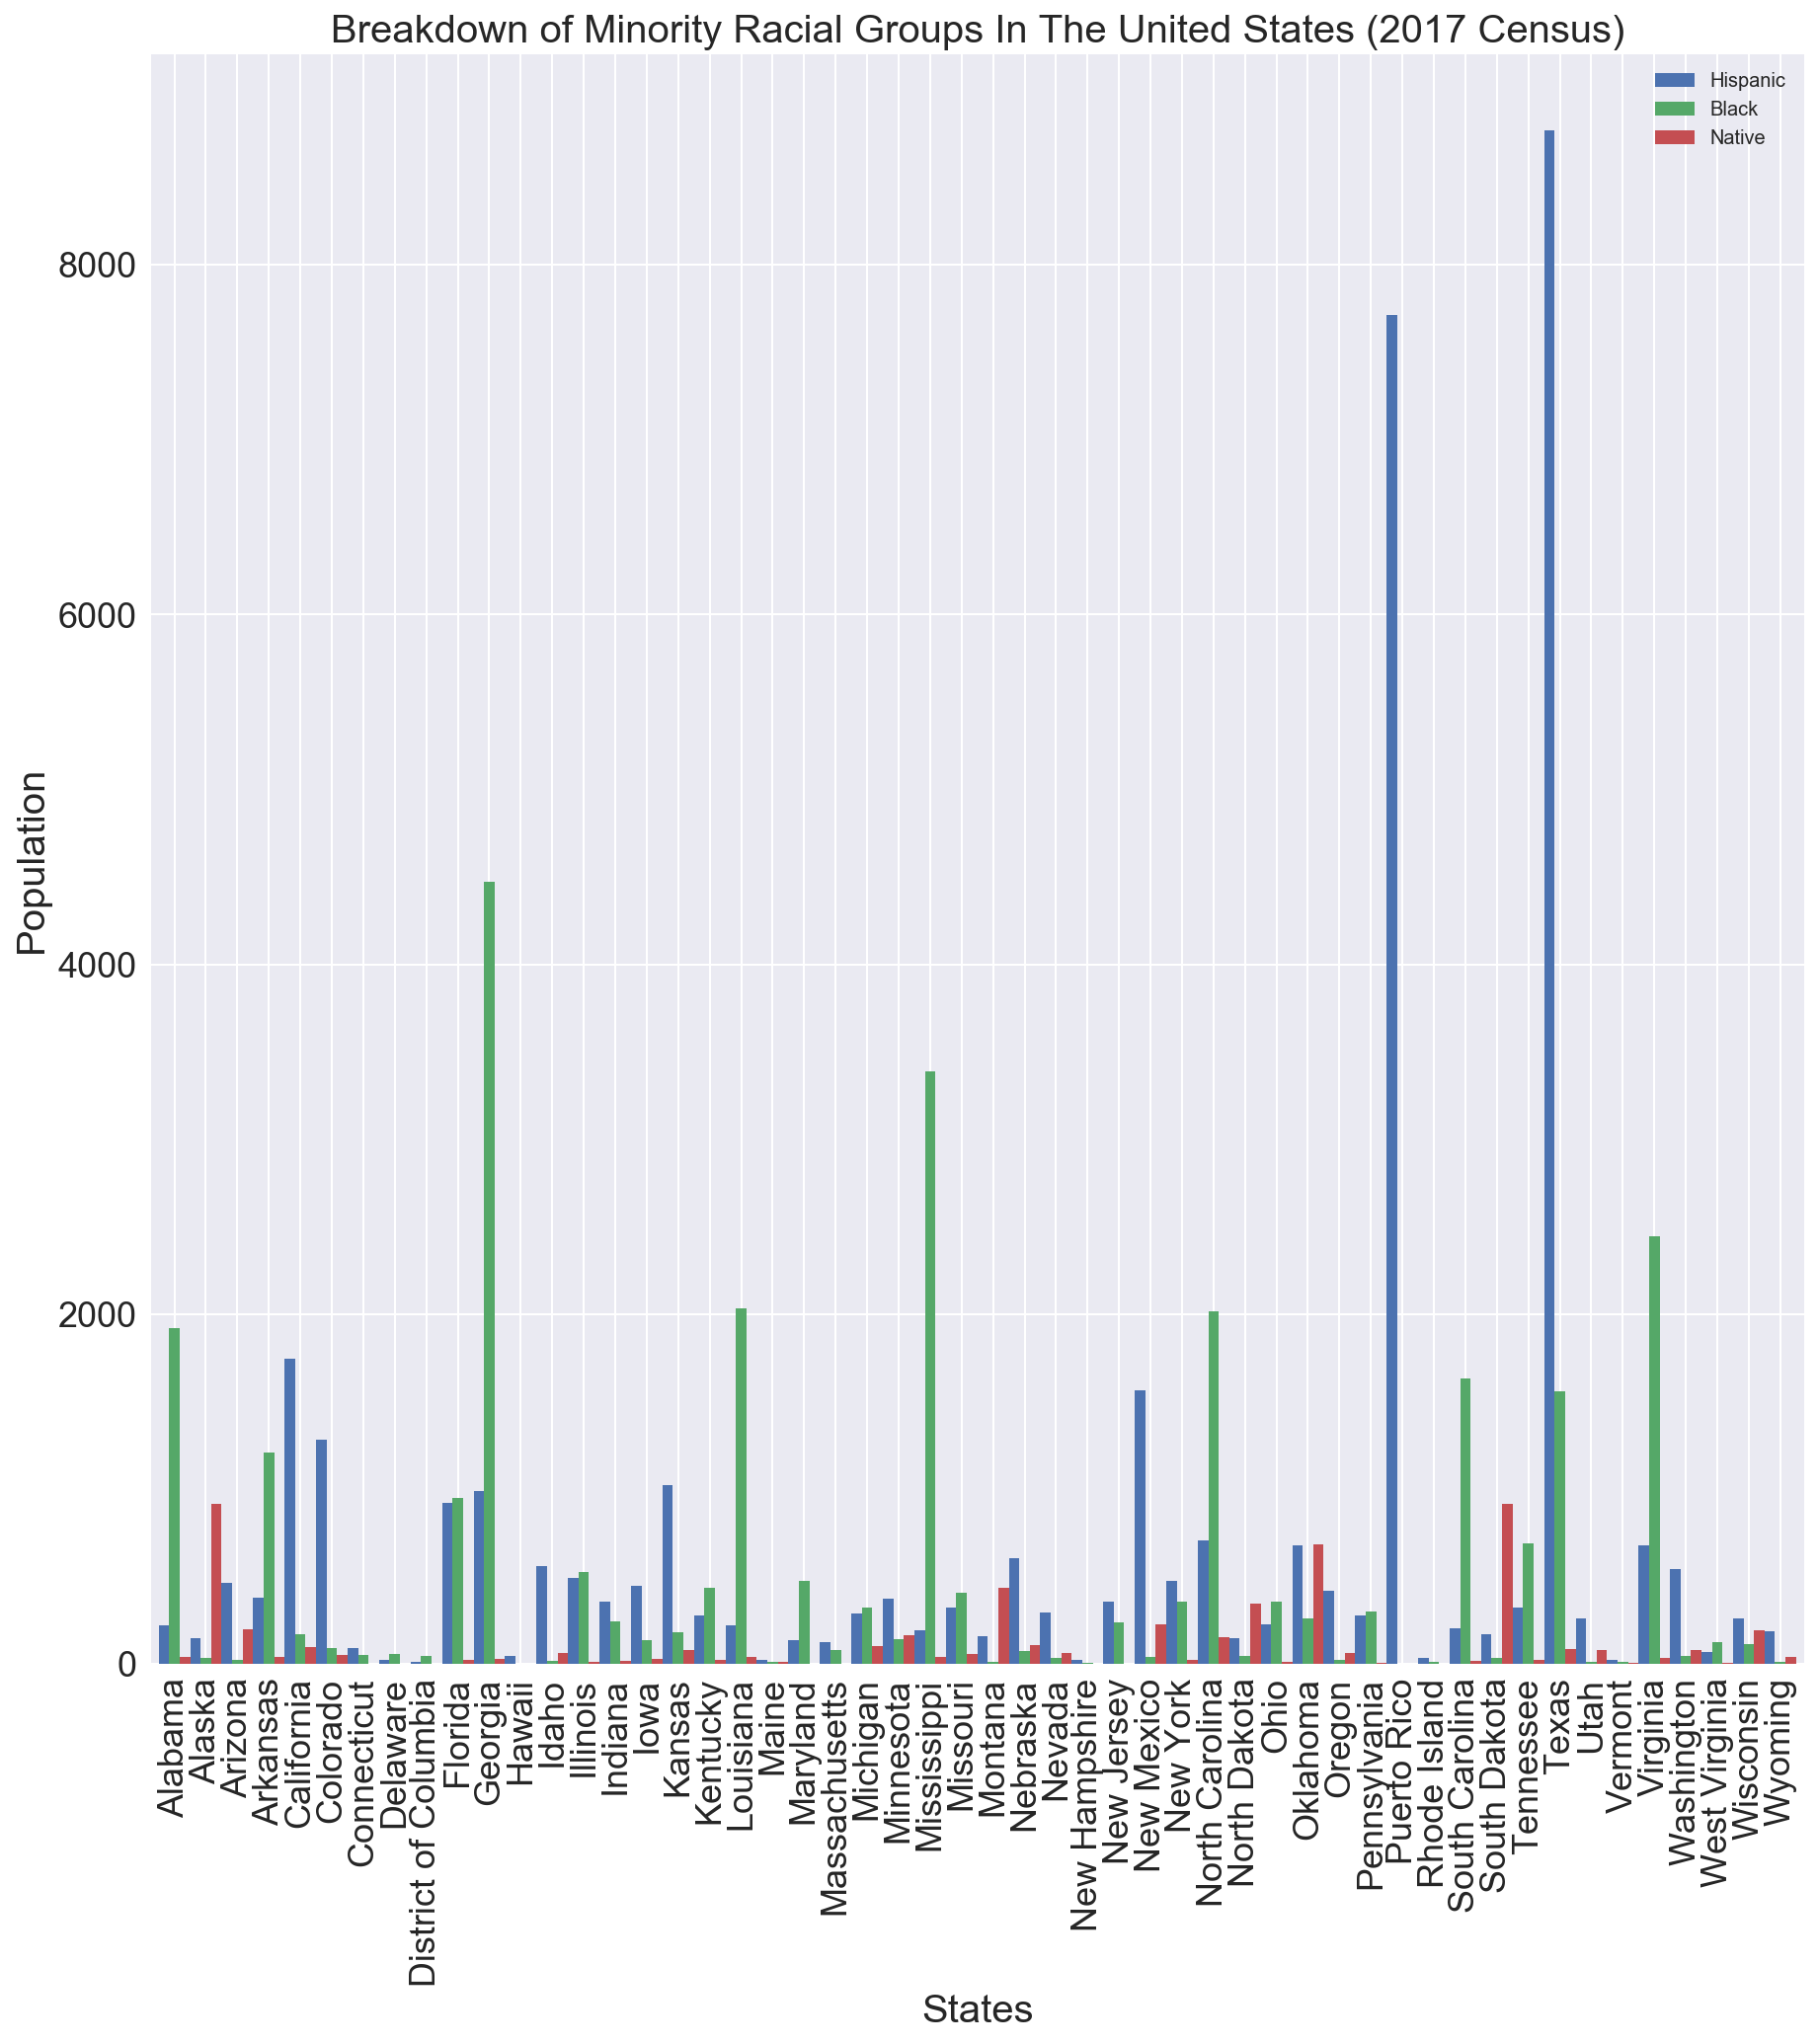

In [12]:
census_data_race_breakdown = census_data_formatted.groupby("State").aggregate(np.sum)
census_data_race_breakdown_plot = census_data_race_breakdown.plot.bar(y = ['Hispanic', 'Black', 'Native'], figsize = (15, 15), legend = True, fontsize = 18, width = 1)
census_data_race_breakdown_plot.set_title("Breakdown of Minority Racial Groups In The United States (2017 Census)", fontsize = 20)
census_data_race_breakdown_plot.set_xlabel("States", fontsize = 20)
census_data_race_breakdown_plot.set_ylabel("Population", fontsize = 20)

As we can see below, within the year of 2017, the states of Texas, Louisiana, and Georgia were amongst the state leaders in terms of climate change. In relation to the spatial distribution of minority groups, we already know the insights of environmental racism within Louisiana and New Orleans as discussed within the first 2 units of the course; however, we also begin to see a pattern of large Hispanic population and large GHG emissions within those particular states, particularly when discussing Puerto Rico and Texas. In fact, according to the Environmental Defense Fund (EDF), "Climate change has a tremendous impact on the health, livelihoods, and overall well-being of U.S. Latinos ... Latinos are more vulnerable to the effects of climate change because of where we live and work. More than half (55%) of Latino-Americans live in three states that are already experiencing serious effects related to climate change: historic drought in California, record-breaking heat in Texas, and increased sea level rise and flooding in Florida. Furthermore, Latinos are more likely to work in the industries that are deeply affected by the effects of climate change such as agriculture, manufacturing, and construction." (EDF) [(Link To Article)](https://www.edf.org/sites/default/files/content/latinos_and_climate_change_factsheet_0317_refresh.pdf)

[]

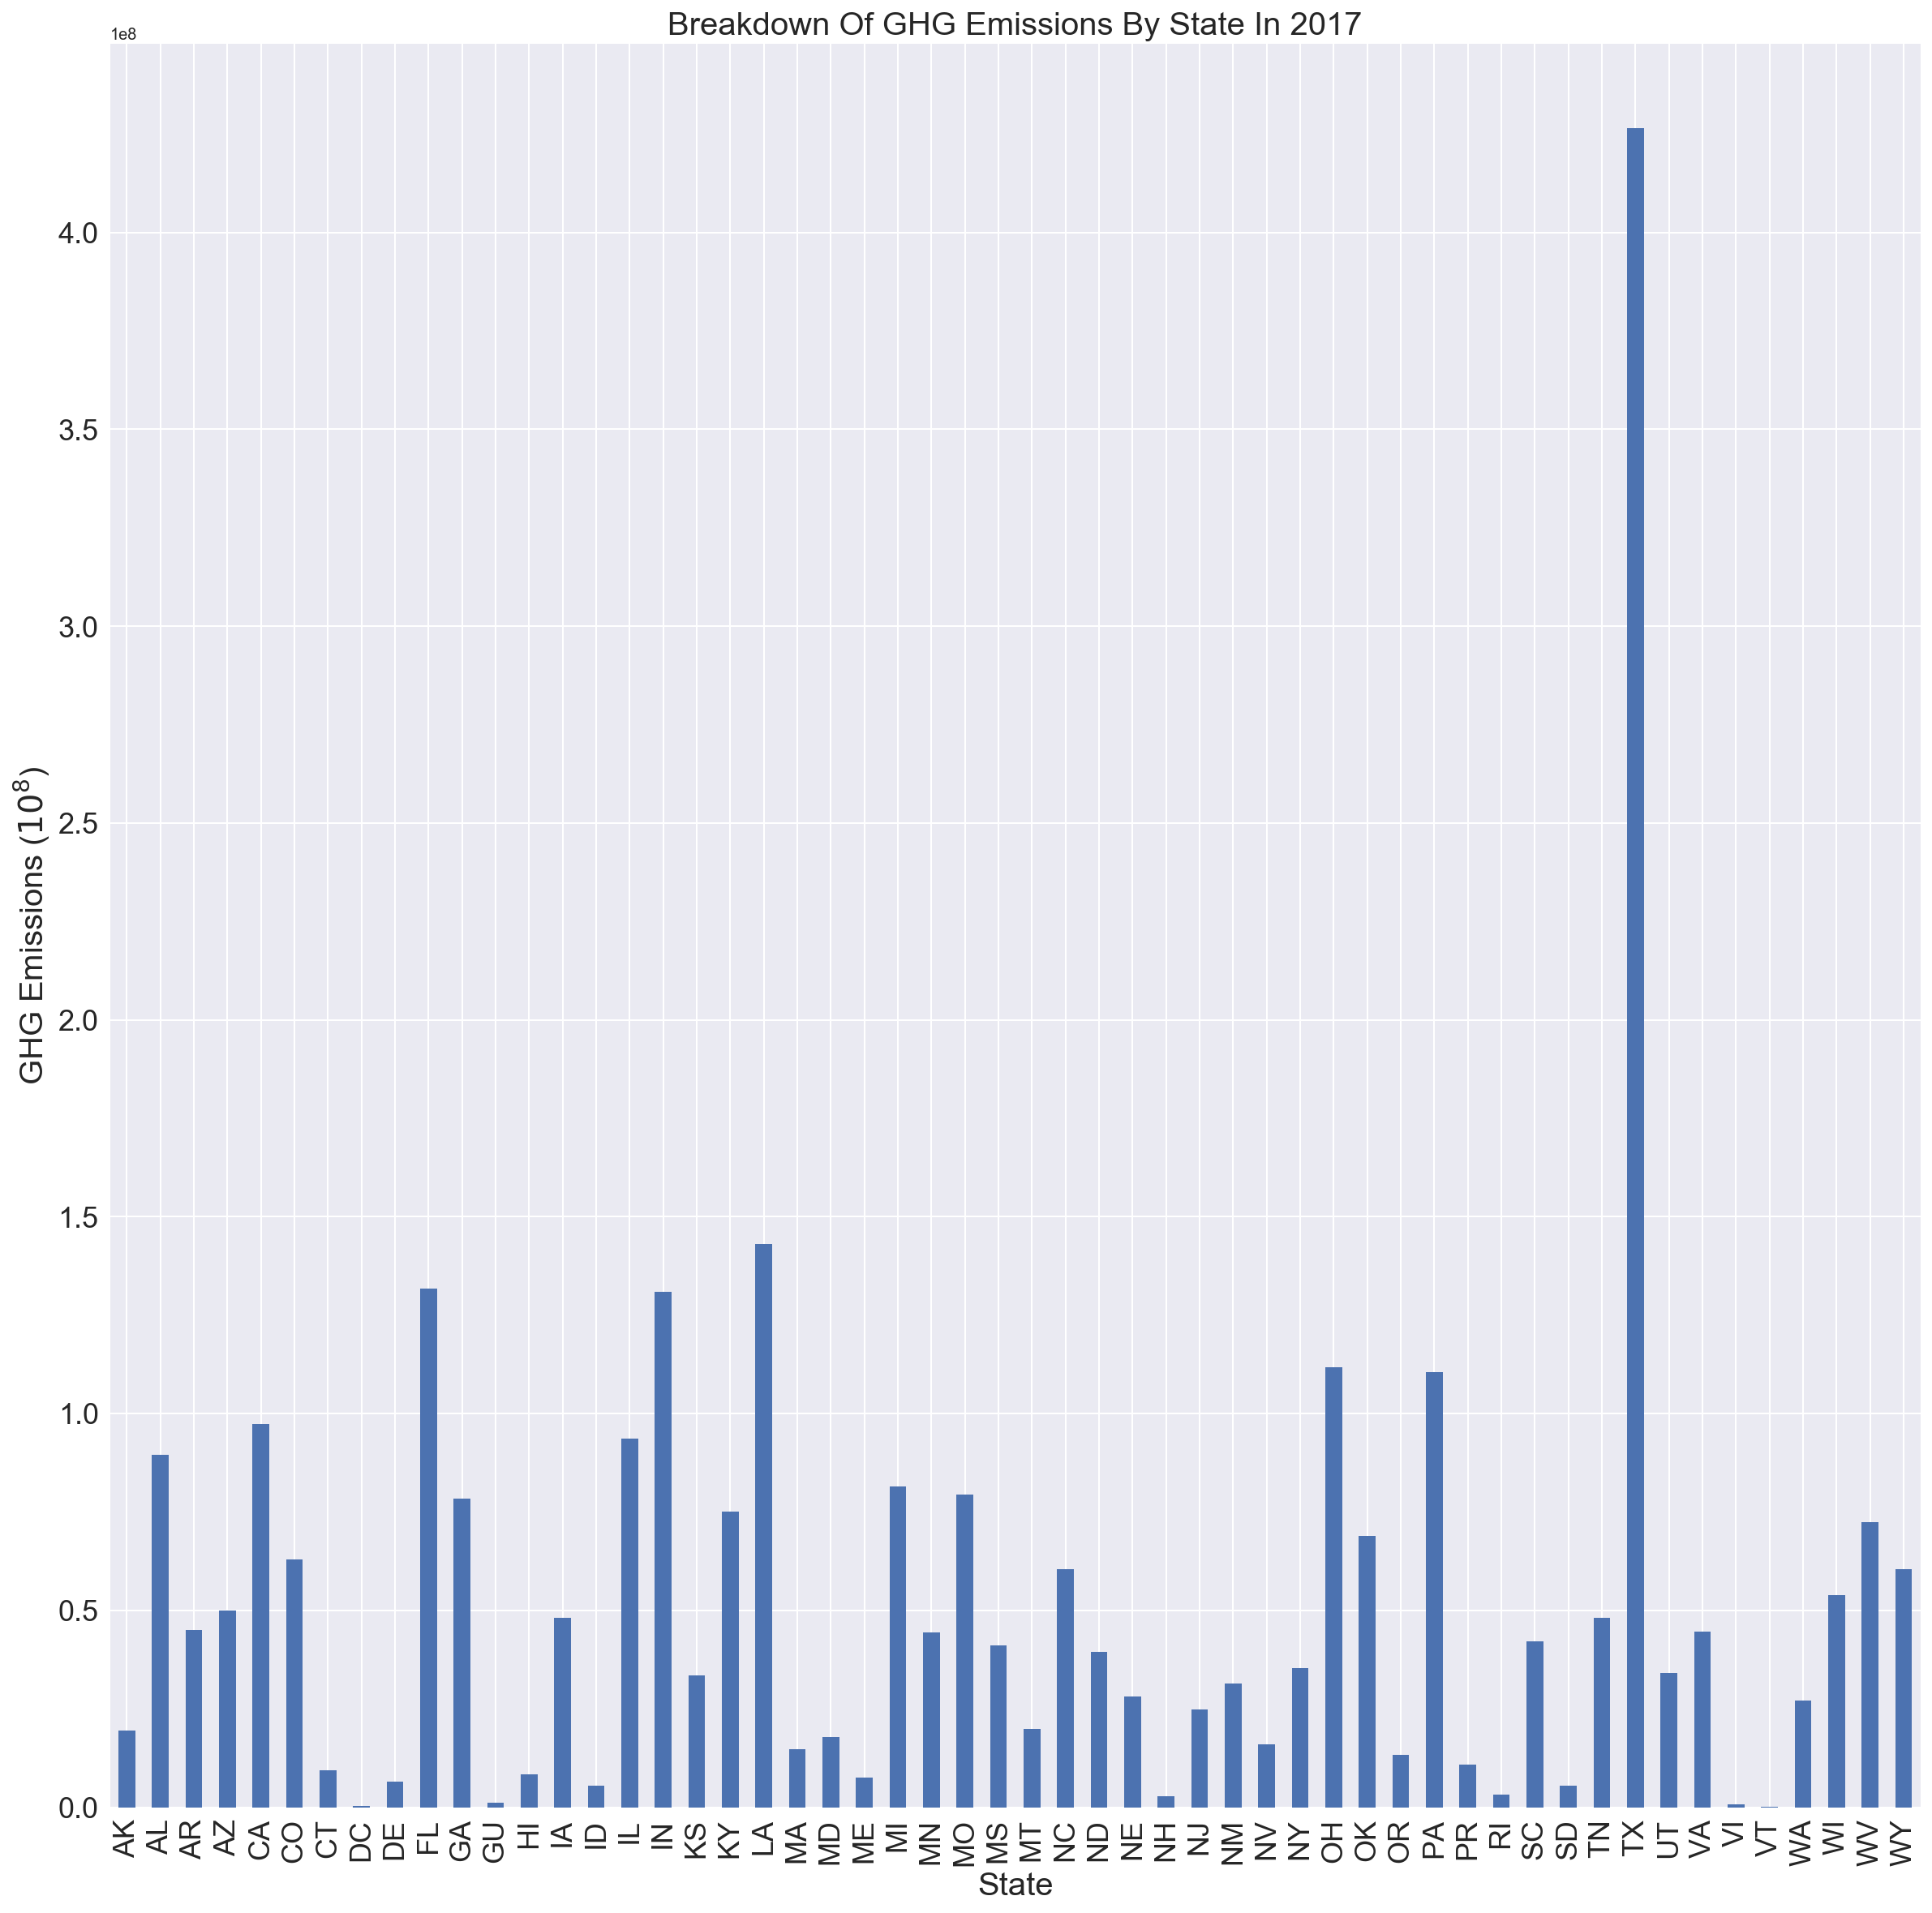

In [13]:
data_2017 = data_formatted[data_formatted['YEAR'] == 2017]

state_data_2017 = data_2017.groupby("STATE").aggregate(np.sum)

state_data_2017_plot = state_data_2017.plot(y="GHG_QUANTITY", kind ='bar', figsize = (20, 20), legend = False, fontsize = 18)
state_data_2017_plot.set_title('Breakdown Of GHG Emissions By State In 2017', fontsize = 20)
state_data_2017_plot.set_xlabel("State", fontsize = 20)
state_data_2017_plot.set_ylabel(r"GHG Emissions ($10^8$)", fontsize = 20)
plt.plot()

However, when we look into GHG emissions per capita in the United States in 2017, we can see that states such as California, Texas, and Indiana appear to be some of the smallest contributors to climate change with states like Wyoming, North Dakota, West Virginia, and Louisiana.

/Users/sunnysahu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[]

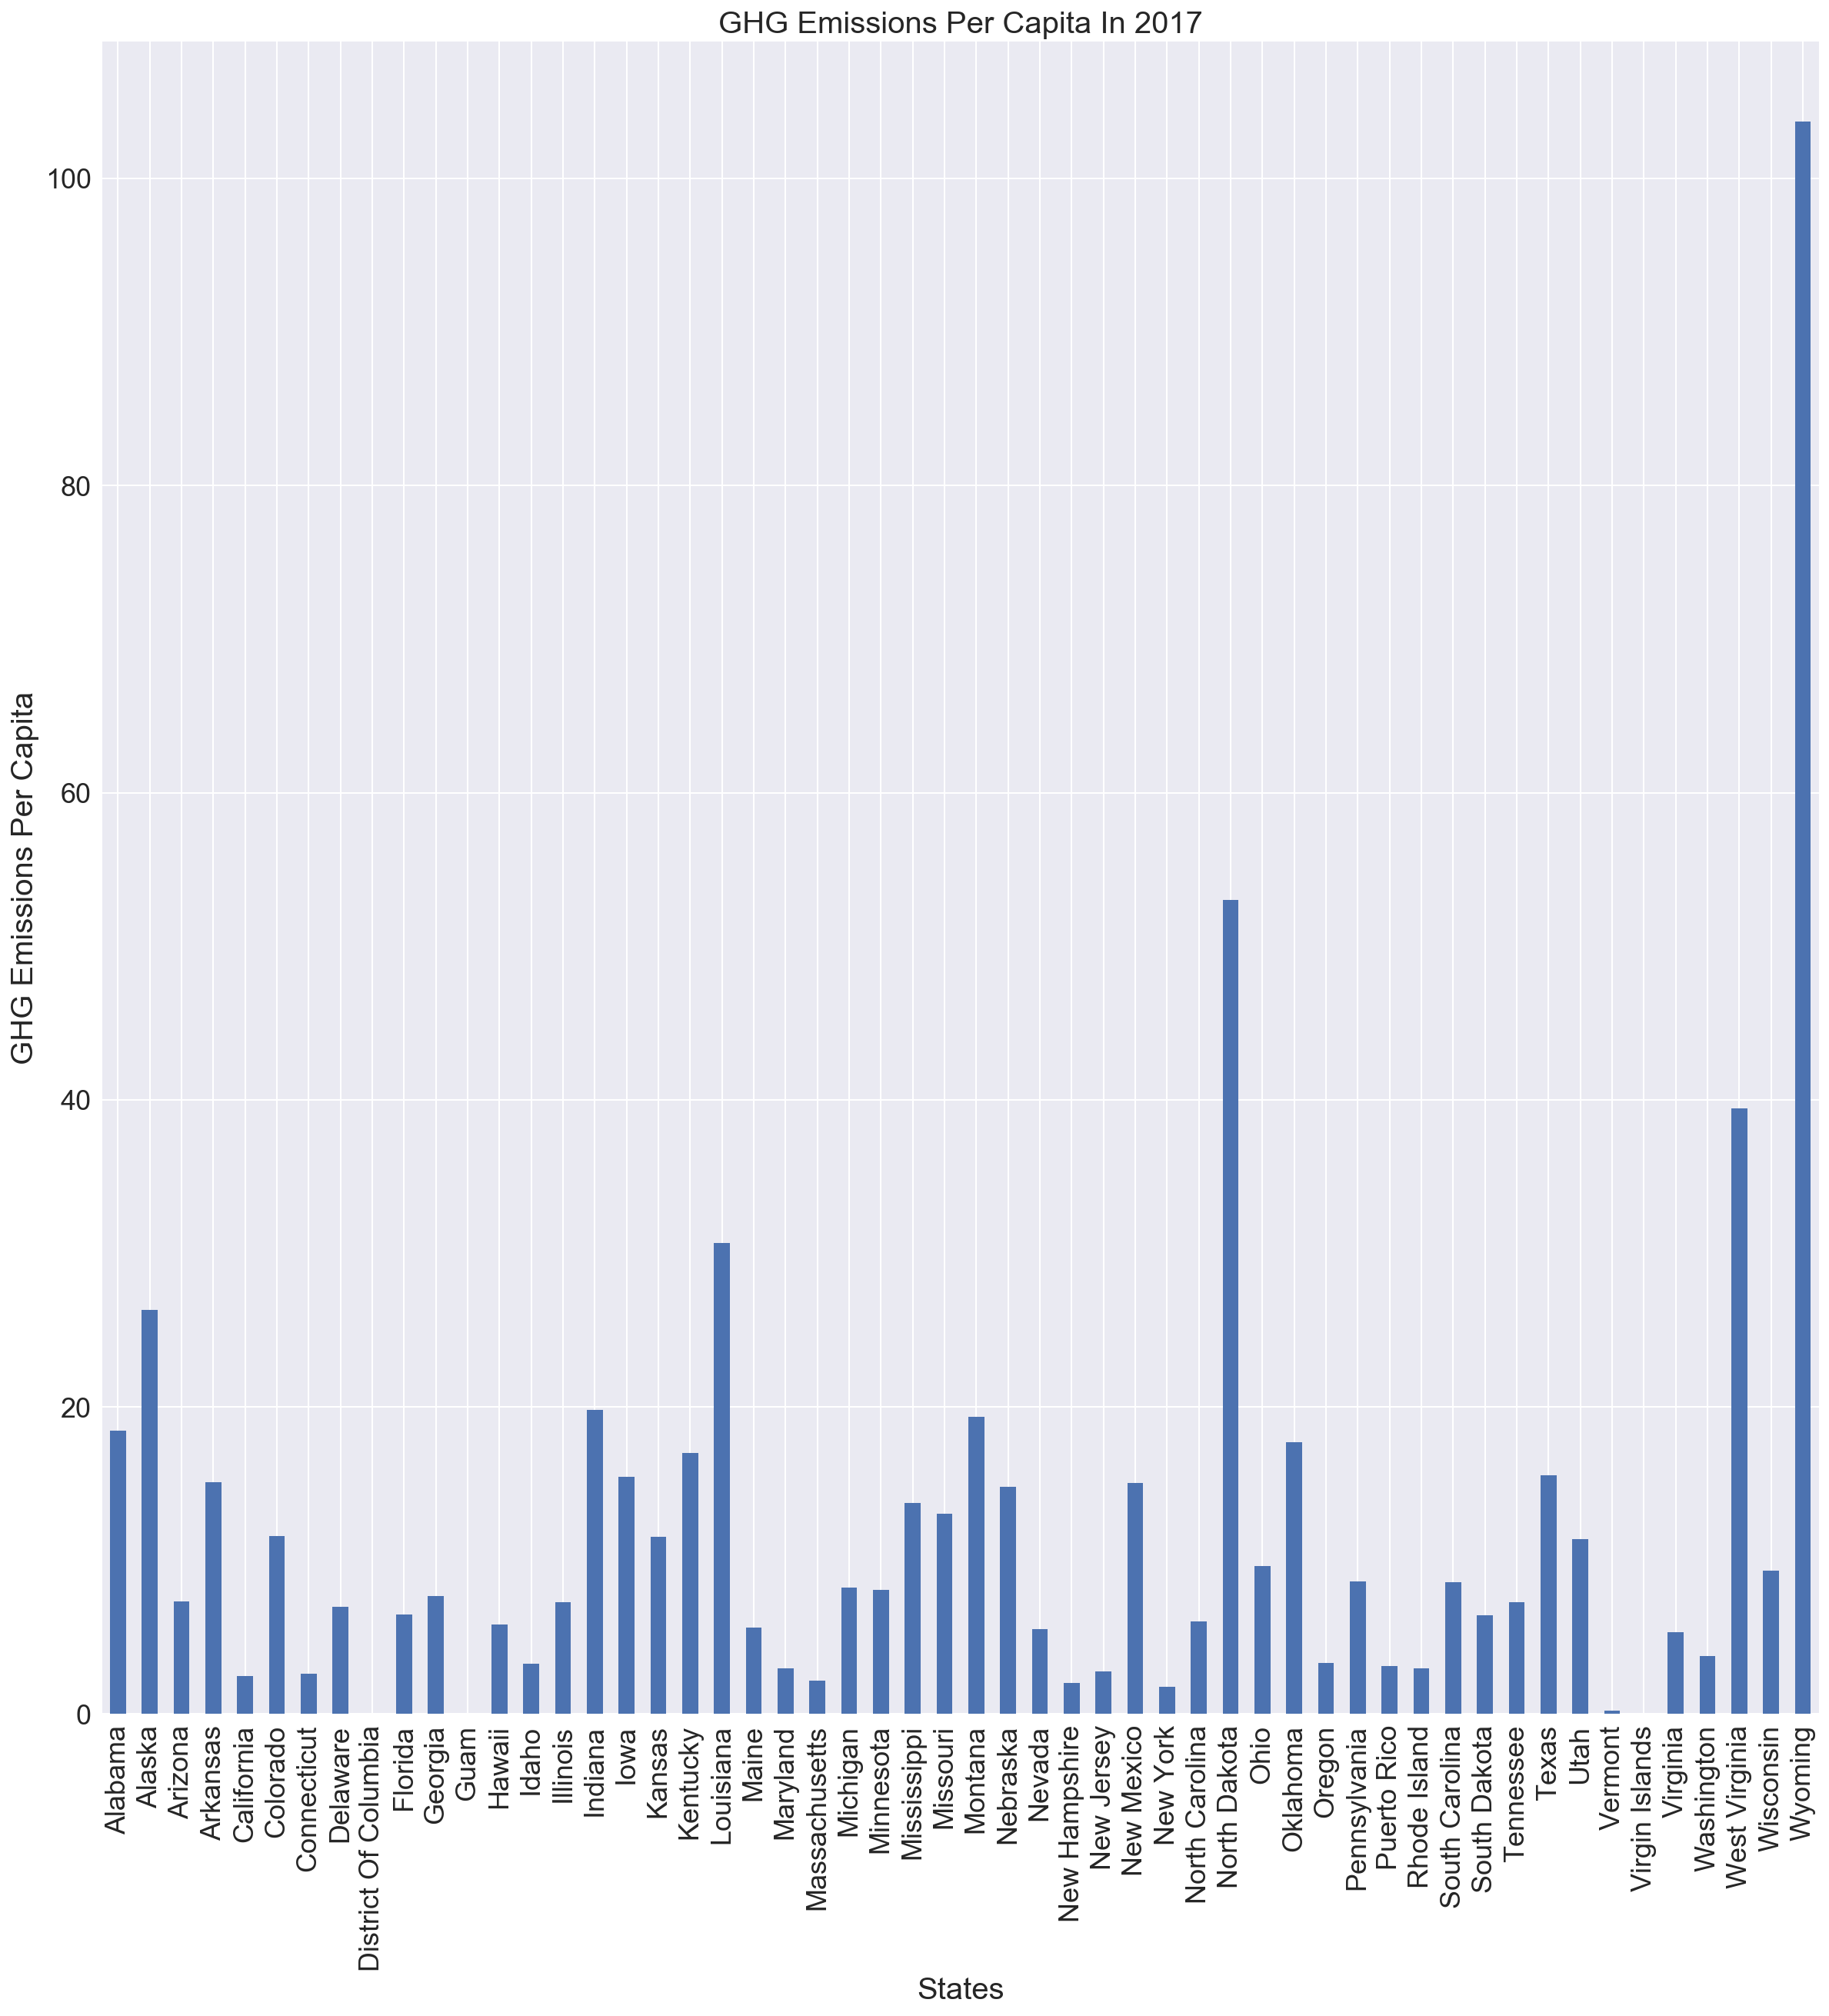

In [56]:
import string
lowerCaseNames = []
for stateNames in data_2017['STATE_NAME']:
    lowerCaseNames.append(string.capwords(stateNames.lower()))
data_2017['STATE_NAME'] = lowerCaseNames
new_state_data_2017 = data_2017.groupby("STATE_NAME").aggregate(np.sum)
joined_table = new_state_data_2017.join(census_data_race_breakdown)
per_capita = [ghg/pop for ghg, pop in zip(joined_table['GHG_QUANTITY'], joined_table['TotalPop'])]
joined_table['PER_CAPITA'] = per_capita
joined_table_plot = joined_table.plot.bar(y="PER_CAPITA", figsize = (20, 20), legend = False, fontsize = 18)
joined_table_plot.set_xlabel("States", fontsize = 20)
joined_table_plot.set_ylabel("GHG Emissions Per Capita", fontsize = 20)
joined_table_plot.set_title("GHG Emissions Per Capita In 2017", fontsize = 20)
plt.plot()

In [14]:
crs_aea_contig_us = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
data_formatted_gdf = gpd.GeoDataFrame(data_formatted, crs = crs_aea_contig_us, geometry = gpd.points_from_xy(data_formatted['LATITUDE'], data_formatted['LONGITUDE']))
data_formatted_gdf

,ADDRESS1,ADDRESS2,CITY,CO2E_EMISSION,COUNTY,FACILITY_ID,GAS_CODE,GAS_NAME,LATITUDE,LONGITUDE,STATE,STATE_NAME,YEAR,ZIP,FACILITY_NAME,GHG_QUANTITY,geometry
0,310 East Frontage Road,NaN,Kaukauna,2349.400,Outagamie,1000421,CO2,Carbon Dioxide,44.320400,-88.208900,WI,WISCONSIN,2018,54130,Fox Energy Center,2349.400,POINT (44.320 -88.209)
1,15400 VILLWOCK RD,NaN,EDWARDSPORT,746.192,Knox,1001541,N2O,Nitrous Oxide,38.806700,-87.247200,IN,INDIANA,2016,47500,Edwardsport,2.504,POINT (38.807 -87.247)
2,NaN,NaN,Barstow,21499.500,WARD COUNTY,1005215,CH4,Methane,31.522500,-103.465278,TX,TEXAS,2016,79719,Mivida Treater Plant,859.980,POINT (31.523 -103.465)
3,15 MILES N.W. OF WENDOVER NV,NaN,WEST WENDOVER,346763.600,ELKO COUNTY,1005828,CO2,Carbon Dioxide,40.821260,-114.250199,NV,NEVADA,2016,89883,GRAYMONT WESTERN US INC PILOT PEAK,346763.600,POINT (40.821 -114.250)
4,11910 CR 492,NaN,TYLER,56.250,SMITH COUNTY,1001662,CH4,Methane,32.434420,-95.362850,TX,TEXAS,2017,75706,TYLER PIPE COMPANY,2.250,POINT (32.434 -95.363)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278210,71 MONAS WAY,NaN,SALEM,32903.900,DODDRIDGE COUNTY,1011071,CO2,Carbon Dioxide,39.207500,-80.554080,WV,WEST VIRGINIA,2014,26426,MORGAN COMPRESSOR STATION,32903.900,POINT (39.208 -80.554)
278211,17700 South Highway T,NaN,Deerfield,14.500,VERNON COUNTY,1010610,CH4,Methane,37.807250,-94.585301,MO,MISSOURI,2014,64741,ADM Deerfield,0.580,POINT (37.807 -94.585)
278212,1 ThyssenKrupp Drive,NaN,Calvert,18.476,WASHINGTON,1010763,N2O,Nitrous Oxide,31.156240,-88.012750,AL,ALABAMA,2012,36513,Outokumpu Stainless USA LLC,0.062,POINT (31.156 -88.013)
278213,105 East Port Lane,NaN,Summerville,17.880,DORCHESTER COUNTY,1011691,N2O,Nitrous Oxide,33.044777,-80.210887,SC,SOUTH CAROLINA,2018,29483,Lauscha Fiber International,0.060,POINT (33.045 -80.211)
